# Text Preprocessing

## Acquire data

- Scrap a web page or load from file etc.

## Text Preprocessing Steps

* **Tokenization:** Breaking text into individual words or symbols.
* **Normalization:** Converting text to a consistent format: lowercase, removing diacritics, handle contractions, typos, and other inconsistencies; Remove punctuation, special characters, and other irrelevant elements.
* **Stop word removal:** Removing common words that don't provide much meaning (e.g., "the," "and," "a").
* **Stemming:** Reducing words to their root form (e.g., "running" becomes "run").
* **Lemmatization:** Reducing words to their root form while considering grammatical context (e.g., "better" becomes "good").



## Example



### **Data Acqusition**: Scrap a Movie Review from the Internet

The following code imports the `requests` library and attempts to download the a movie review, from the specified URL `ew.com`.

In [ ]:
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b1',
    'Referer': 'https://ew.com//'
}

# Download a movie review
url = 'https://ew.com/megalopolis-review-francis-ford-coppola-film-bloated-dull-8710050'

response = requests.get(url, headers=headers)
html_doc = response.text

# Print the text to check the content
print(html_doc)

: 

### Extract the Review Text:

To extract the actual reviews from the downloaded HTML, you can use libraries like BeautifulSoup:

In [12]:
from bs4 import BeautifulSoup

# Assuming you have the downloaded HTML content in the 'text' variable
soup = BeautifulSoup(html_doc, 'html.parser')

# Find the elements containing the reviews (you might need to adjust the selector)
reviews = soup.find_all('div', class_='loc article-content')

# Extract the text from firts review element
review_texts = [review.get_text(strip=True) for review in reviews]

# Now you have a list containing the extracted review texts.
print(review_texts)

['Despite being nearly three hours long, more substantive sentences have probably been written about whatMegalopolismight be than what is actually in the script.Francis Ford Coppolachanged cinema as we know it, and hisGodfatherfilms will remain hallmarks of American filmmaking. But his latest film (and possibly his last) is a stain on his legacy. SomehowMegalopolismanages to be both chaotic and unspeakably boring.Coppola melds Ancient Rome with modern-day New York, which is a stab at commentary on America’s own declining empire (look out for the “Make Rome Great Again” sign and the pointed line about politicians only needing to be entertainers). It’s a noble aspiration, if only the film actually said anything coherent.Adam Driver in \'Megalopolis\'.American ZoetropeMegalopolistrailer pulled after using fake quotes from critics about other Francis Ford Coppola moviesCesar Catilina (Adam Driver) is at war for the soul of his city. When he discovers new entity Megalon, which is some sort 

### Visualize the Raw Review Text

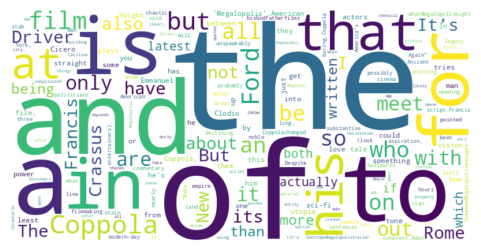

In [13]:
import requests
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

tokens = review_texts[0].split() # the first review

# Generate word frequencies
word_freq = Counter(tokens)

# Generate and plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)

# Step 6: Display the word cloud
plt.figure(figsize=(6, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.title("Word Cloud of Movie Review")
plt.show()


### Normalization





In [14]:
# Raw Text
raw_text = review_texts[0]

# 1. Lowercase the text
cleaned_text = raw_text.lower()

# 2. Remove punctuation
import string
cleaned_text = ''.join(char for char in cleaned_text if char not in string.punctuation)

print(cleaned_text)

despite being nearly three hours long more substantive sentences have probably been written about whatmegalopolismight be than what is actually in the scriptfrancis ford coppolachanged cinema as we know it and hisgodfatherfilms will remain hallmarks of american filmmaking but his latest film and possibly his last is a stain on his legacy somehowmegalopolismanages to be both chaotic and unspeakably boringcoppola melds ancient rome with modernday new york which is a stab at commentary on america’s own declining empire look out for the “make rome great again” sign and the pointed line about politicians only needing to be entertainers it’s a noble aspiration if only the film actually said anything coherentadam driver in megalopolisamerican zoetropemegalopolistrailer pulled after using fake quotes from critics about other francis ford coppola moviescesar catilina adam driver is at war for the soul of his city when he discovers new entity megalon which is some sort of chemical or building ma

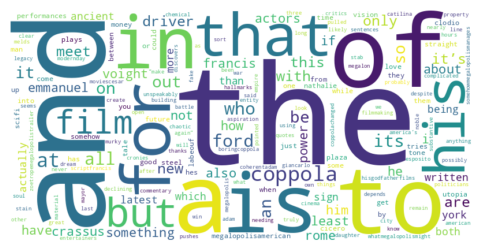

In [15]:
tokens = cleaned_text.split()

# Generate word frequencies
word_freq = Counter(tokens)

# Generate and plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)

# Step 6: Display the word cloud
plt.figure(figsize=(6, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("")
plt.show()


### Most Frequent Tokens/Words

In [16]:
# Print the most common words and their counts
for word, count in word_freq.most_common(50):
    print(f"{word}: {count}")

the: 35
and: 28
of: 28
a: 26
to: 24
is: 18
in: 14
for: 12
that: 12
his: 11
but: 9
film: 9
coppola: 9
at: 8
ford: 6
its: 6
all: 6
who: 6
be: 5
it: 5
on: 5
out: 5
an: 5
so: 5
with: 4
new: 4
only: 4
it’s: 4
driver: 4
this: 4
are: 4
meet: 4
have: 3
about: 3
rome: 3
if: 3
francis: 3
he: 3
him: 3
emmanuel: 3
also: 3
crassus: 3
voight: 3
power: 3
not: 3
actors: 3
least: 3
how: 3
i: 3
something: 3


In [ ]:
content = ""
for word, count in word_freq.most_common():
    content += f"{word}: {count}\n"

print(content)
with open('word_frequencies.txt', 'w', encoding='utf-8') as f:
    f.write(content)

### Stopword Removal

**Stop words** are common words in a language that are often removed from text data before processing. These words, such as "the," "and," "a," "in," and "it," typically do not carry significant semantic meaning and can add noise to text analysis tasks.

**Why remove stop words?**

* **Reduce dimensionality:** Removing stop words can significantly reduce the dimensionality of the feature space, making it easier to process and analyze text data.
* **Improve accuracy:** Stop words can often introduce noise into models, leading to reduced accuracy. Removing them can help improve the performance of NLP tasks like text classification, sentiment analysis, and information retrieval.
* **Focus on meaningful words:** By removing stop words, you can focus on the more informative words in the text, which can provide better insights.

**Common stop words:**

The specific set of stop words can vary depending on the language and domain. However, here are some common English stop words:

* the, and, a, in, to, is, it, that, of, for, this, on, that, by, with, from, at, into, what, if, who, which, which, we, they, you, I, he, she, it, its, his, hers, our, theirs, their, to, for, with, in, of, on, by, from, at, into, what, if, who, which, which, we, they, you, I, he, she, it, its, his, hers, our, theirs, their, to, for, with, in, of, on, by, from, at, into, what, if, who, which, which, we, they, you, I, he, she, it, its, his, hers, our, theirs, their, to, for, with, in, of, on, by, from, at, into, what, if, who, which, which, we, they, you, I, he, she, it, its, his, hers, our, theirs, their

## **Important Note:**

While removing stop words can be beneficial in many cases, it's important to consider the specific requirements of your NLP task. Sometimes, stop words may contain important information, and removing them could lead to a loss of valuable context.


In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))  # Assuming the text is in English

print(stop_words)

{'there', 'now', 'herself', 'it', 'any', 'further', 'above', 'after', 'about', 'before', 'own', 'be', "wouldn't", 'other', 'a', "doesn't", 'had', "you'd", "she's", 'will', 'wasn', 'been', 'off', 'me', 'hasn', 'their', 'shouldn', 't', 'ours', 'didn', 'such', 'doing', 'why', 'couldn', 'until', "won't", "needn't", 'than', 'yourself', 'yourselves', 'himself', 'she', 'up', 'we', 'some', 'won', 'whom', 'very', 'at', "hasn't", "mustn't", 'what', 'through', 'are', 'once', 'you', 'during', 'by', 'from', 'each', "it's", 'her', 'is', 'should', 'has', 'o', 'how', 'here', 'hers', "you've", 've', 'too', 'the', 'so', 'don', 'y', 'shan', "weren't", 'not', 'few', 're', 'll', 'doesn', 'haven', 'which', 'itself', 'as', 'they', 'mustn', 'yours', 'our', 'needn', 'over', 'those', 'these', 'or', 'between', 'did', 'out', 'was', 'below', 'but', 'all', "isn't", "shouldn't", 'isn', 'can', 's', 'weren', 'having', 'against', 'themselves', 'that', "should've", 'him', 'does', 'an', 'm', 'he', 'have', "that'll", 'ma'

In [19]:
# 1. Lowercase the text
normalized_text = raw_text.lower()

# 2. Remove punctuation
import string
cleaned_text = ''.join(char for char in normalized_text if char not in string.punctuation)

# 3. Stopword removal
reduced_text = ' '.join(token for token in cleaned_text.split() if token not in stop_words)

print(reduced_text)

despite nearly three hours long substantive sentences probably written whatmegalopolismight actually scriptfrancis ford coppolachanged cinema know hisgodfatherfilms remain hallmarks american filmmaking latest film possibly last stain legacy somehowmegalopolismanages chaotic unspeakably boringcoppola melds ancient rome modernday new york stab commentary america’s declining empire look “make rome great again” sign pointed line politicians needing entertainers it’s noble aspiration film actually said anything coherentadam driver megalopolisamerican zoetropemegalopolistrailer pulled using fake quotes critics francis ford coppola moviescesar catilina adam driver war soul city discovers new entity megalon sort chemical building material truly never clear pushes create megalopolis utopia open dream depends murky property battle mayor cicero giancarlo esposito cicero seems likely win thanks cronies things get complicated daughter julia nathalie emmanuel asks job cesar ends falling it’s tale fe

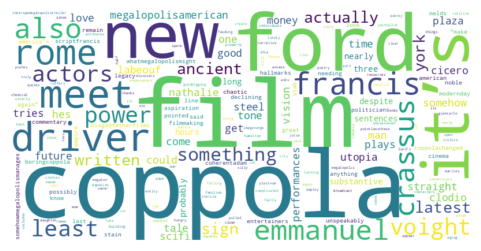

In [20]:
tokens = reduced_text.split()

# Generate word frequencies
word_freq = Counter(tokens)

# Generate and plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)

# Step 6: Display the word cloud
plt.figure(figsize=(6, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("")
plt.show()


### Low Frequency Tokens/Words


In [21]:
from collections import Counter

tokens = cleaned_text.split()

# Generate word frequencies
word_freq = Counter(tokens)

# Get the least common words
least_common_words = word_freq.most_common()[-20:]

# Print the least common words
for word, frequency in least_common_words:
    print(f"{word}: {frequency}")

fodder: 1
dystopian: 1
visions: 1
heartening: 1
see: 1
optimistic: 1
butmegalopolisgrants: 1
dubious: 1
honor: 1
addition: 1
mastermind: 1
behind: 1
two: 1
cinemas: 1
greatest: 1
achievements: 1
now: 1
architect: 1
worstgrade: 1
f: 1


### Frequency Analysis: Zipf's law

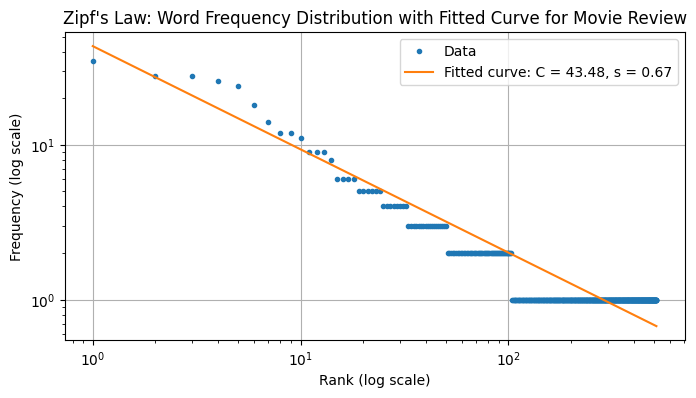

Fitted equation: f(r) = 43.48 / r^0.67


In [22]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

tokens = cleaned_text.split()

# Generate word frequencies
word_freq = Counter(tokens)

# Sort by frequency (most common first)
sorted_word_freq = word_freq.most_common()

# Rank words and get their frequencies
ranks = np.arange(1, len(sorted_word_freq) + 1)
frequencies = np.array([freq for _, freq in sorted_word_freq])

# Define the Zipf function to fit: f(r) = C / r^s
def zipf_law(rank, C, s):
    return C / (rank ** s)

# Step 7: Use curve_fit to fit the Zipf law model to the data
popt, pcov = curve_fit(zipf_law, ranks, frequencies)

C, s = popt  # Extract the constants

# Step 8: Plot the data and the fitted curve
plt.figure(figsize=(8, 4))
plt.loglog(ranks, frequencies, marker=".", linestyle='none', label="Data")
plt.loglog(ranks, zipf_law(ranks, *popt), label=f"Fitted curve: C = {C:.2f}, s = {s:.2f}")
plt.title("Zipf's Law: Word Frequency Distribution with Fitted Curve for Movie Review")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.legend()
plt.grid(True)
plt.show()

# Output the fitted equation
print(f"Fitted equation: f(r) = {C:.2f} / r^{s:.2f}")

### Hapax Legomena and Dis Legomena

**Hapax legomena** and **dis legomena** are terms used in linguistics to describe words that appear in a text corpus with a specific frequency.

* **Hapax legomenon:** A word that appears only once in a given text corpus.
* **Dis legomenon:** A word that appears twice in a given text corpus.

These terms are often used in corpus linguistics, text analysis, and lexicography to study the vocabulary and style of a text or author.

**Significance of Hapax Legomena and Dis Legomena:**

* **Vocabulary richness:** The number of hapax legomena can provide insights into the vocabulary richness of a text or author. A high number of hapax legomena may indicate a diverse and specialized vocabulary.
* **Authorial style:** The frequency of hapax legomena and dis legomena can be indicative of an author's style and writing habits. For example, a high frequency of hapax legomena might suggest a more creative or experimental style.
* **Lexical analysis:** Studying hapax legomena and dis legomena can help identify unique or uncommon words, which can be valuable for lexical analysis and lexicography.

**Identifying Hapax Legomena and Dis Legomena:**

To identify hapax legomena and dis legomena in a text corpus, you can use various techniques, such as:

* **Word frequency analysis:** Count the frequency of each word in the corpus and identify those that appear only once or twice.
* **Lexical analysis tools:** Use specialized tools designed for lexical analysis to extract information about word frequency and usage.
* **Programming languages:** Implement custom algorithms or use libraries like Python's `collections.Counter` to count word frequencies.

**Example:**

Consider the following text: "The quick brown fox jumps over the lazy dog. The dog is lazy."

* **Hapax legomena:** "quick," "brown," "jumps," "lazy," "fox"
* **Dis legomena:** "dog"

In this example, "dog" appears twice, making it a dis legomenon. The other words appear only once, making them hapax legomena.


In [23]:
def count_words_with_frequency(text, frequency):
    word_freq = {}
    for word in text.split():
        word_freq[word] = word_freq.get(word, 0) + 1

    count = 0
    for word, freq in word_freq.items():
        if freq == frequency:
            count += 1

    return count

# Example usage
frequency = 2
result = count_words_with_frequency(cleaned_text, frequency)
print(f"Number of words with frequency {frequency}: {result}")

Number of words with frequency 2: 53


# Text Classification

**Classification tasks** in Natural Language Processing (NLP) involve categorizing text data into predefined classes or categories. These tasks aim to assign labels or tags to text documents based on their content, such as sentiment analysis, author detection, topic classification, or intent detection.

**Common classification tasks include:**

* **Sentiment analysis:** Determining the overall sentiment of a text, such as positive, negative, or neutral.
* **Author detection:** Also known as authorship attribution, is a classification task in natural language processing (NLP) that aims to identify the author of a given piece of text.
* **Topic classification:** Assigning text documents to specific topics or categories, like news, sports, or politics.
* **Intent detection:** Identifying the user's intent behind a given text, such as asking a question, making a request, or providing information.



## Document Similarity

**Problem Definition:**

> Given two documents detemine whether they are similar or not based on their content.

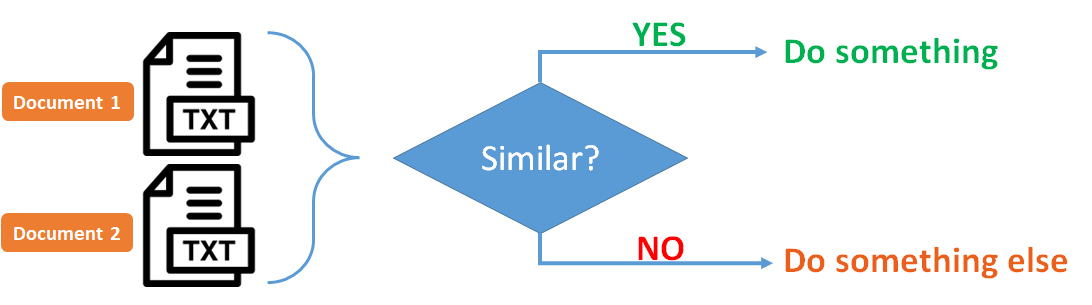

## Example Documents

We'll use 4 "generated" documents for this example. The documents are generated via the *deepai.org GPT2* transformer model.

https://deepai.org/machine-learning-model/text-generator

Those 4 syntetic documents are generated using two prompts (as the context): the first prompt is used for *doc1* and *doc2* and the second prompt for *doc3* and *doc4*.

By doing so, we can **assume** that

* **doc1** and **doc2** have **similar** content, and
* **doc3** and **doc4** have **similar** content, and
* **doc1** and **doc2** as a group is NOT similar to both **doc3** and **doc4**.

Prompts:

*  **Prompt-1** for *doc1* and *doc2*: "Natural language processing (NLP) is a
subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language."


* **Prompt-2** for *doc3* and *doc4*:"Web development is the work involved in developing a website for the Internet (World Wide Web) or an intranet (a private network). Web development can range from developing a simple single static page of plain text to complex web applications, electronic businesses, and social network services."


In [24]:
doc1 = """
Natural language processing (NLP) is a subfield of linguistics, computer science,
and artificial intelligence concerned with the interactions between computers
and human language.

The goal is to use such technologies as machine learning to evaluate language
judgments and to present them to policymakers in terms of public health.

Language and the human brain

NLP has been at the centre of several important advancements in
computational linguistics and the science of computation and its applications
since the 1960s. As a tool of social science research, neural networks have been
developed that can integrate human intelligence (an advantage to many machines
and AI systems for which NLP is not yet widely accessible), and algorithms are
applied that employ a diverse range of human cognitive abilities, providing
a new understanding of cognition.

Although NLP requires extensive knowledge of every aspect of human language,
the fact remains that only a small proportion of it is currently developed
and deployed in a practical setting (e.g., English [4]), while other aspects of
NLP are frequently used to interpret information in the context of the context
of a larger societal effort [5]. While the computational complexity of NLP,
however, greatly surpasses the complexity of the human brain in defining words
and sentences, the process of learning, using examples and examples, facilitates
both development and use within our own cultural traditions.

Language has also been a key ingredient in understanding social behavior.
In contrast to the human brain, human language processing, which relies on
information processing to understand personal, social, and even philosophical
responses, represents a unique way of approaching the problem of language use.
As such, it is important to explore the impact of NLP on this issue and
how it may influence human social behavior through language acquisition and
the development of language processing tools.

How it influences social behavior

The present study evaluated all the potential human cognitive and social
influence on social behavior as well as language in the context of NLP.
Using a cross-section of over 800,000 words, our study identified the following
factors that might influence the distribution of negative social behaviors:

(i) People's perceptions of social factors: If people think people are more
favorable to people with more positive emotional states, the distribution of
negative social behaviors can be thought of as an inverse distribution,
i.e., the distribution of positive social behaviors corresponds to the
distribution of the distribution of negative social behaviors.
"""

doc2 = """
Natural language processing (NLP) is a subfield of linguistics, computer science,
and artificial intelligence concerned with the interactions between computers
and human language.

According to the National Institute of Neurological Disorders
and Stroke (NINST), approximately 40 to 60 percent of Americans describe NLP
(including the non-verbal communication system) as either non-native
(no foreign language spoken, non-native spoken, or one that appears to be native
and unrelated to another) or English-language (native) speech
(e.g., from one person's personal communications via Skype or other phone).
Additionally, there is widespread evidence that language is not always the same
across persons and groups at a level that is related to one another.
Individuals with no language other than one's own language are more likely to
express their identity as a human when the conversation involves a non-native language:
one-to-one or bilingual conversation for instance. Individuals with languages other
than English should be considered to be non-native even though English-speaking,
for instance, is often understood by other persons while also being used in
contexts other than English.

One interpretation of NLP is that some people may not express their identity or
identity as native when conversations involving non-native speakers are more
general (see below), while others may express their identity when speaking English.
As the NLP issue will continue to evolve, the scope of the NLP field will likely
decrease, reflecting increased efforts at understanding the nature and extent of
this process in the future. This article briefly summarizes how the field of NLP
has evolved over the last few decades to recognize the need for ongoing efforts
for development and enforcement of this understanding (which is often referred
to as "the NLP community"), but also proposes how this recognition would benefit
the linguistics community, and is supported by several sources.
"""

doc3 = """
Web development is the work involved in developing a website for the Internet
(World Wide Web) or an intranet (a private network). Web development can range
from developing a simple single static page of plain text to complex
web applications, electronic businesses, and social network services.

Web development will change in the way we talk and interact with the Web,
as well as in the way we make our products appear, act, live, and perform on
the Web. To facilitate these changes, web developers create responsive web pages,
that combine design with interaction, that have strong, well-organized visual
styles and elements, and that can be used as a frontend or as part of a
large-scale production application. By incorporating the Web as such into
a design, we will become a multi-dimensional web, or a web-based model of
the Web itself.

For example, we'll start with a website written in JavaScript, and will create
the page as a user navigates a Web browser. That website, if we can find,
is accessible from browser mode, from which it is displayed. If, after
navigating to that page, we're not very familiar with where it is, the initial
Web page and other elements in that page will be inaccessible. We'll add the
web in this way to make the user experience more interactive and effective as
well as to introduce some of the most powerful markup we will build into
Web design in the future.

Our goal is to create a responsive, responsive Web based on our approach to
Web design. In addition to our goal of a responsive Web, Web developers will
also build other HTML-based frameworks as well, as they discover how to leverage
 the power of HTML to build dynamic, robust site architecture. These frameworks
 will then be built out of the Web in one or more parts, with more content that
 users have a good idea what an HTML page looks like.

Developing a responsive Web will be important in many areas. We intend to have
these Web pages in the form of multiple interactive widgets and menus.
These widgets will be composed of markup with interactive elements that
allow the user to quickly interact with the site by interacting with other
parts of the widget, like the buttons that appear on the screen. In addition,
each of these HTML widgets will also have a display element that provides
a reference to an incoming message, which will be used to display messages
for the users on a specific page. These widgets are often used for a range
of other applications like web hosting and web site analysis.
"""

doc4 = """
Web development is the work involved in developing a website for the Internet
(World Wide Web) or an intranet (a private network). Web development can range
from developing a simple single static page of plain text to complex web
applications, electronic businesses, and social network services.

There are two main types of web development, the most common one is software
development. The main job of software development is producing software with
the goal of enhancing the usability of the user. The work involved in developing
an electronic book, for example, consists of writing a short article, sending
it to the customer and giving them feedback, and then giving them a link to
the download page with which they should access the book. This usually takes
5 to 10 years, whereas the time used for coding and web development varies widely.

There are other types of programming, such as scripting and programming languages
(MS) and online software development (OMS). However, the major type of work is
software development. The main task of software development is the creation of
tools for creating websites, web services, mobile apps, and software solutions.
The majority of these technologies may not be simple or comprehensive but they
can be thought of as software development tools.

Software Development as a Personal Work

In the field of software development, the main focus of work is the development
of software. People, businesses, or individuals are working in their own time,
but some work in the background is also a personal hobby. However, the main
contribution that a business or organization makes is often to help make some
of the products or services available by allowing a user or other user to become
familiar with these products and services. This can be achieved or forced by
the user to spend time learning different programming languages, using different
tools, or getting additional benefits if they are familiar with the latest software.

Another common way in which software developers are employed is through work
through the IT division or as part of a team or team-based group where they
serve the customers, by contributing to the project or providing their services,
such as hosting and hosting services of the computer network. In addition to
this specialized role, a specific job is also offered in this field. It is very
hard for an IT professional to take up this work where he would be stuck working
for a big multinational company. As such, IT companies are usually willing to
fill any of the positions with the help of computer operators, computer systems
designers, programmers with computer systems, or programmers who understand
languages such as Java and JavaScript. The main job that a large IT company
brings to the table is that of providing the services.
"""

## Trivial Approach
A trivial approach (a simple solution) to the problem of content similarity between two documents can be a comparison of the documents with respect to the set of words constituting the 4 documents at hand.

In this approach, it is **assumed** that:

> two documents are similar to each other in content, if they have the same set of words.

---
---


**Step 1**: Tokenization.

To apply this approach, **we first need** to obtain **the sets of words** for doc1, doc2, doc3 and doc4.

To obtain **the sets of words** for the 4 documents, we need to determine the "**words**" (i.e. tokens) that constitute a document.

**Tokenization**: Tokenization is the process of dividing a string of input characters into tokens that can be used for the further NLP tasks.


> **Tokenization of doc1**

In [25]:
# Tokenize doc1 and check first 10 tokens
doc1_tokens = doc1.split();
#doc1_tokens[:10] # you may do a rough check or
print("First 10 tokens for doc 1: {}".format(doc1_tokens[:10])); # may do a formatted one.

First 10 tokens for doc 1: ['Natural', 'language', 'processing', '(NLP)', 'is', 'a', 'subfield', 'of', 'linguistics,', 'computer']


> **Tokenize doc2, doc3 and doc4**

In [26]:
# Tokenize doc2, doc3, doc4 similarly and check first 6 tokens
doc2_tokens = doc2.split();
print("First 10 tokens for doc 2: {}".format(doc2_tokens[:10]))
doc3_tokens = doc3.split();
print("First 10 tokens for doc 3: {}".format(doc3_tokens[:10]))
doc4_tokens = doc4.split();
print("First 10 tokens for doc 4: {}".format(doc4_tokens[:10]))

First 10 tokens for doc 2: ['Natural', 'language', 'processing', '(NLP)', 'is', 'a', 'subfield', 'of', 'linguistics,', 'computer']
First 10 tokens for doc 3: ['Web', 'development', 'is', 'the', 'work', 'involved', 'in', 'developing', 'a', 'website']
First 10 tokens for doc 4: ['Web', 'development', 'is', 'the', 'work', 'involved', 'in', 'developing', 'a', 'website']


**Step-2**: Measure of Similarity

---

In this approach, the **measure of similarity** for two documents is **the number of common words/tokens** shared by those documents.

That is:

 $sim(doc_A,doc_B)=doc_A ∩ doc_B $

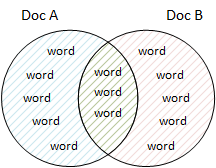

**Sub-Step1:** Convert the token-list of doc1, $doc\_ tokens_1$ to set of tokens $token\_set_1$.

Here, since $token\_set_1$ is a set, there is no dublicate token, i.e. **vocabulary** of doc1.


In [27]:
# The set of tokens for doc1
token_set1 = set(); # create an empty set

# Convert list of tokens to set of tokens
for token in doc1_tokens:
  token_set1.add(token); # dublicate tokens will be discarded

# Length of doc1, i.e. the number of tokens in doc1
print("# of tokens in doc1 = {}".format(len(doc1_tokens)));
# Size of the vocabulary, i.e. distinct tokens/words in doc1
print("# of distinct tokens in doc1 = {}".format(len(token_set1)));
print("First 5 token in vocab for doc1: {} \n".format(list(token_set1)[:5]));

# of tokens in doc1 = 402
# of distinct tokens in doc1 = 222
First 5 token in vocab for doc1: ['computation', 'range', 'concerned', 'language,', 'The'] 



**Exercise**

Repat "**Sub-Step 1**" for doc 2, 3 and 4, and print out the results

In [28]:
# The set of tokens for doc2, doc3 and doc4
# doc2
token_set2 = {token for token in doc2_tokens};# Set comprehension
print("# of tokens in doc2 = {}".format(len(doc2_tokens)));
print("# of distinct tokens in doc2 = {}".format(len(token_set2)));
print("First 5 token in vocab for doc2: {} \n".format(list(token_set2)[:5]));

# doc3
token_set3 = {token for token in doc3_tokens};
print("# of tokens in doc3 = {}".format(len(doc3_tokens)));
print("# of distinct tokens in doc3 = {}".format(len(token_set3)));
print("First 5 token in vocab for doc3: {} \n".format(list(token_set3)[:5]));

# doc4
token_set4 = {token for token in doc4_tokens};
print("# of tokens in doc4 = {}".format(len(doc4_tokens)));
print("# of distinct tokens in doc4 = {}".format(len(token_set4)));
print("First 5 token in vocab for doc4: {}".format(list(token_set4)[:5]));


# of tokens in doc2 = 296
# of distinct tokens in doc2 = 178
First 5 token in vocab for doc2: ['reflecting', 'there', 'concerned', 'with', 'English'] 

# of tokens in doc3 = 437
# of distinct tokens in doc3 = 216
First 5 token in vocab for doc3: ['introduce', 'range', 'act,', 'network', 'experience'] 

# of tokens in doc4 = 462
# of distinct tokens in doc4 = 231
First 5 token in vocab for doc4: ['available', 'range', 'customers,', 'hard', 'time,']


**Sub-Step 2**: Perform the similarity measurements among doc1, doc2, doc3 and doc4.

In [29]:
# Make a list of token sets for doc1, doc2, doc3 and doc4
token_sets = [token_set1, token_set2, token_set3, token_set4];

# Calculate similarity between all pairs of documents
sims = [[len(s1.intersection(s2)) for s2 in token_sets] for s1 in token_sets];
#for s1 in token_sets:
#  for s2 in token_sets:
#    sims.append(len(s1.intersection(s2)));

print("\td1\td2\td3\td4\n");
print("d1\t{}\t{}\t{}\t{}".format(sims[0][0],sims[0][1],sims[0][2],sims[0][3]));
print("d2\t{}\t{}\t{}\t{}".format(sims[1][0],sims[1][1],sims[1][2],sims[1][3]));
print("d3\t{}\t{}\t{}\t{}".format(sims[2][0],sims[2][1],sims[2][2],sims[2][3]));
print("d4\t{}\t{}\t{}\t{}".format(sims[3][0],sims[3][1],sims[3][2],sims[3][3]));


	d1	d2	d3	d4

d1	222	54	38	45
d2	54	178	29	37
d3	38	29	216	79
d4	45	37	79	231


> **Put everthing together:**

In [30]:
# ------------------------------------------------------------------------------
# Set based document similarity measurement
# ------------------------------------------------------------------------------
corpus = [doc1, doc2, doc3, doc4]; # Corpus, i.e. list of documents
vocabs = [set(doc.split()) for doc in corpus]; # vocabulary of each document

# Similarity measurements
sims = [[len(s1.intersection(s2)) for s2 in vocabs] for s1 in vocabs];

print("\td1\td2\td3\td4\n");
print("d1\t{}\t{}\t{}\t{}".format(sims[0][0],sims[0][1],sims[0][2],sims[0][3]));
print("d2\t{}\t{}\t{}\t{}".format(sims[1][0],sims[1][1],sims[1][2],sims[1][3]));
print("d3\t{}\t{}\t{}\t{}".format(sims[2][0],sims[2][1],sims[2][2],sims[2][3]));
print("d4\t{}\t{}\t{}\t{}".format(sims[3][0],sims[3][1],sims[3][2],sims[3][3]));

	d1	d2	d3	d4

d1	222	54	38	45
d2	54	178	29	37
d3	38	29	216	79
d4	45	37	79	231


### **Normalization of Similarity Measurements**

Weakness of the current measure:

*  As the length of the documents increases, the number of common words in the intersection set of two documents increases. This a weakness for the current measure, because similarity tends to be higher for longer documents.

Solution: **Length Normalization**
$$ similarity(doc_1, doc_2) = \frac{intersection}{union}  = \frac{doc_1 \cap doc_2}{doc_1 \cup doc_2} $$

**Pros:**
* Magnitudes of the similarities measured among documents are comparable to each other.
  - For the example, it is now apparent that $sim(doc_1,doc_2) > sim(doc_1, doc_3)$ and $sim(doc_1,doc_2) > sim(doc_1, doc_4)$.
* Similarity measure now in unit scale, i.e. $0 ≤ sim(.,.) ≤ 1$

In [31]:
# Improved Similarity Measure

sims = [[len(s1.intersection(s2)) / len(s1.union(s2)) for s2 in token_sets] for s1 in token_sets];
#for s1 in token_sets:
#  for s2 in token_sets:
#    sims.append( len(s1.intersection(s2)) / len(s1.union(s2)) );

print("\td1\td2\td3\td4\n");
print("d1\t{:3.2f}\t{:3.2f}\t{:3.2f}\t{:3.2f}".format(sims[0][0],sims[0][1],sims[0][2],sims[0][3]));
print("d2\t{:3.2f}\t{:3.2f}\t{:3.2f}\t{:3.2f}".format(sims[1][0],sims[1][1],sims[1][2],sims[1][3]));
print("d3\t{:3.2f}\t{:3.2f}\t{:3.2f}\t{:3.2f}".format(sims[2][0],sims[2][1],sims[2][2],sims[2][3]));
print("d4\t{:3.2f}\t{:3.2f}\t{:3.2f}\t{:3.2f}".format(sims[3][0],sims[3][1],sims[3][2],sims[3][3]));


	d1	d2	d3	d4

d1	1.00	0.16	0.10	0.11
d2	0.16	1.00	0.08	0.10
d3	0.10	0.08	1.00	0.21
d4	0.11	0.10	0.21	1.00


## Stemming and Lemmatization

### Stemming

**Stemming** is a process of reducing words to their root form or stem. This is done by removing suffixes or prefixes, such as "s", "ed", "ing", or "ly". Stemming is often used in natural language processing tasks like text classification, information retrieval, and search engines to normalize words and reduce the dimensionality of the feature space.

**Examples of stemming:**

* **Play** becomes "play"
* **Playing** becomes "play"
* **Played** becomes "play"
* **Plays** becomes "play"
* **Happiness** becomes "happy"
* **Unhappy** becomes "happy"

**Stemming algorithms:**

There are various stemming algorithms, each with its own strengths and weaknesses. Some common algorithms include:

* **Porter stemmer:** A widely used stemming algorithm developed by Martin Porter.
* **Snowball stemmer:** A family of stemmers based on the Porter stemmer, with adaptations for different languages.
* **Lancaster stemmer:** Another popular stemming algorithm known for its aggressive stemming.


In [33]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

words = ["jumping", "jumped", "jumps", "playing", "played", "plays", "happiness", "unhappy"]

for word in words:
    stemmed_word = stemmer.stem(word)
    print(f"{word} -> {stemmed_word}")

jumping -> jump
jumped -> jump
jumps -> jump
playing -> play
played -> play
plays -> play
happiness -> happi
unhappy -> unhappi


> **Apply Stemming to example Docs**

In [34]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# ------------------------------------------------------------------------------
# Set based document similarity measurement
# ------------------------------------------------------------------------------
corpus = [doc1, doc2, doc3, doc4]; # Corpus, i.e. list of documents
vocabs = [set([stemmer.stem(token) for token in doc.split()]) for doc in corpus]; # vocabulary of each document

# Similarity measurements
sims = [[len(s1.intersection(s2)) / len(s1.union(s2)) for s2 in token_sets] for s1 in token_sets];

print("\td1\td2\td3\td4\n");
print("d1\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(sims[0][0],sims[0][1],sims[0][2],sims[0][3]));
print("d2\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(sims[1][0],sims[1][1],sims[1][2],sims[1][3]));
print("d3\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(sims[2][0],sims[2][1],sims[2][2],sims[2][3]));
print("d4\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(sims[3][0],sims[3][1],sims[3][2],sims[3][3]));

	d1	d2	d3	d4

d1	1.00	0.16	0.10	0.11
d2	0.16	1.00	0.08	0.10
d3	0.10	0.08	1.00	0.21
d4	0.11	0.10	0.21	1.00


### Lemmatization

**Lemmatization** is a process of reducing words to their dictionary form or lemma. Unlike stemming, lemmatization takes into account the grammatical context of a word to determine its root form. This can result in more accurate results, especially for irregular verbs and nouns.

**Examples of lemmatization:**

* **Playing** becomes "play"
* **Played** becomes "play"
* **Plays** becomes "play"
* **Happiness** becomes "happy"
* **Unhappy** becomes "happy"
* **Am** becomes "be"
* **Is** becomes "be"
* **Are** becomes "be"

**Lemmatization algorithms:**

Some common lemmatization algorithms include:

* **WordNet lemmatizer:** Uses WordNet, a lexical database of English, to find the lemma of a word.
* **SpaCy lemmatizer:** A lemmatizer included in the SpaCy natural language processing library.
* **NLTK lemmatizer:** A lemmatizer included in the Natural Language Toolkit (NLTK) library.

As you can see in the following example, the lemmatizer correctly identifies the lemma for irregular verbs like "am", "is", and "are".


In [35]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [36]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

words = ["playing", "played", "plays", "happiness", "unhappy", "am", "is", "are"]

for word in words:
    lemma = lemmatizer.lemmatize(word)
    print(f"{word} -> {lemma}")

playing -> playing
played -> played
plays -> play
happiness -> happiness
unhappy -> unhappy
am -> am
is -> is
are -> are


> **Apply Lematization to example docs**

In [37]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# ------------------------------------------------------------------------------
# Set based document similarity measurement
# ------------------------------------------------------------------------------
corpus = [doc1, doc2, doc3, doc4]; # Corpus, i.e. list of documents
vocabs = [set([lemmatizer.lemmatize(token) for token in doc.split()]) for doc in corpus]; # vocabulary of each document

# Similarity measurements
sims = [[len(s1.intersection(s2)) / len(s1.union(s2)) for s2 in token_sets] for s1 in token_sets];

print("\td1\td2\td3\td4\n");
print("d1\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(sims[0][0],sims[0][1],sims[0][2],sims[0][3]));
print("d2\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(sims[1][0],sims[1][1],sims[1][2],sims[1][3]));
print("d3\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(sims[2][0],sims[2][1],sims[2][2],sims[2][3]));
print("d4\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(sims[3][0],sims[3][1],sims[3][2],sims[3][3]));

	d1	d2	d3	d4

d1	1.00	0.16	0.10	0.11
d2	0.16	1.00	0.08	0.10
d3	0.10	0.08	1.00	0.21
d4	0.11	0.10	0.21	1.00


# Put all preprocessing steps together

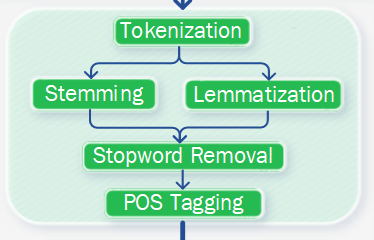

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
import re
from nltk.corpus import stopwords

# Step 1: Casefolding
corpus = [doc1.casefold(), doc2.casefold(), doc3.casefold(), doc4.casefold()];

# Step 2: Tokenize - no punctuation, no non-printable chars like "\n"
# regex_rule accepts only alpha-numeric chars
regex_rule = r'\w+'; #
clean_corpus = [' '.join(re.findall(regex_rule,doc)) for doc in corpus]

# Step 3: Remove stop words
stop_words = set(stopwords.words('english'))
reduced_corpus = [' '.join([word for word in doc.split() if word not in stop_words]) for doc in clean_corpus]


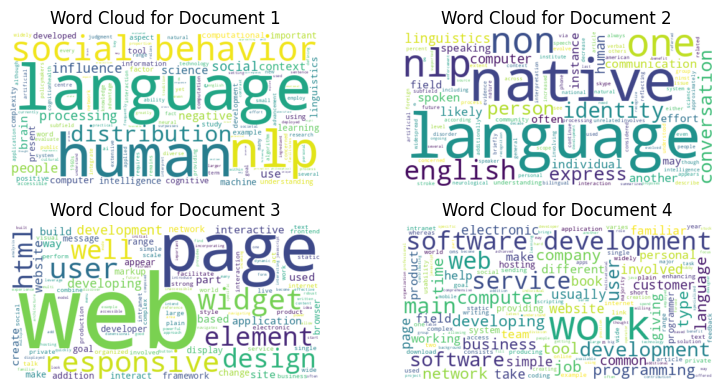

In [41]:
# Step 4: Lemmatize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_corpus = [' '.join([lemmatizer.lemmatize(word) for word in doc.split()]) for doc in reduced_corpus];


import matplotlib.pyplot as plt
from wordcloud import WordCloud

num_rows = 2  # Adjust the number of rows as needed
num_cols = 2  # Adjust the number of columns as needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 4))  # Adjust figure size if necessary

for i, doc in enumerate(lemmatized_corpus):
    wordcloud = WordCloud(width=500, height=250, background_color='white').generate(doc)
    ax = axes.flatten()[i]  # Get the current subplot
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Word Cloud for Document {i+1}")
    ax.axis('off')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# Document Representations

In natural language processing (NLP), document representation refers to the process of converting a document, which could be a piece of text or a collection of texts, into a numerical or computational form that can be easily utilized by machine learning algorithms. The goal is to capture the semantic meaning of the document in a way that allows algorithms to analyze and understand the content.

There are several methods for document representation in NLP, and each has its own strengths and weaknesses. Here are some commonly used techniques:

1. **Bag of Words (BoW):**
   - In BoW representation, a document is represented as an unordered set of words, disregarding grammar and word order but considering the frequency of each word.
   - Each word is assigned a unique index, and the document is represented as a vector where each element corresponds to the count of the respective word in the document.
   - BoW is simple and efficient but lacks the ability to capture word semantics and relationships.

2. **Term Frequency-Inverse Document Frequency (TF-IDF):**
   - TF-IDF is another popular method that takes into account both the frequency of a term in a document (TF) and its rarity across the entire dataset (IDF).
   - It assigns higher weights to terms that are frequent in a document but rare in the overall dataset, helping to identify important words specific to a document.

3. **Word Embeddings:**
   - Word embeddings represent words as dense vectors in a continuous vector space. Embeddings are pre-trained on large corpora and capture semantic relationships between words.
   - Techniques like Word2Vec, GloVe, and fastText generate embeddings that can be averaged or concatenated to represent a document. Doc2Vec extends these methods to capture document-level semantics.

4. **Doc2Vec:**
   - Doc2Vec extends Word2Vec to learn fixed-size representations for variable-length pieces of text, such as sentences or documents.
   - Each document is represented by a unique vector, and these vectors are trained to be similar for documents with similar content.

5. **Transformer-Based Models:**
   - Models like BERT (Bidirectional Encoder Representations from Transformers) and GPT (Generative Pre-trained Transformer) learn contextualized embeddings for words and can be fine-tuned for document-level tasks.
   - These models consider the context of each word within the document, capturing intricate relationships and nuances.

6. **Topic Models:**
   - Topic modeling techniques, such as Latent Dirichlet Allocation (LDA), aim to discover underlying topics in a collection of documents.
   - Documents are represented as a mixture of topics, and each topic is characterized by a distribution of words.

The choice of document representation method depends on the specific task, dataset, and the desired level of semantic understanding. Each method has its trade-offs in terms of computational complexity, interpretability, and effectiveness for different NLP applications.


## Bag-of-Words (BOW) Model

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Casefolding
corpus = [doc1.casefold(), doc2.casefold(), doc3.casefold(), doc4.casefold()];

# Step 2: Tokenize - no punctuation, no non-printable chars like "\n"
# regex_rule accepts only alpha-numeric chars
regex_rule = r'\w+'; #
clean_corpus = [' '.join(re.findall(regex_rule,doc)) for doc in corpus]

# Bag of Words Model
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(clean_corpus)
print("Bag of Words Matrix:")
print(bow_matrix.toarray())

Bag of Words Matrix:
[[1 0 1 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 1 0 ... 0 1 0]]


> **Vocabulary of the BOW Model**

In [ ]:
# Access the vocabulary dictionary
vocabulary = list(tuple(vectorizer.vocabulary_.items()))
vocabulary.sort(key=lambda x: x[1])
# Print the vocabulary dictionary
print("Vocabulary:")
print(vocabulary)

Vocabulary:
[('000', 0), ('10', 1), ('1960s', 2), ('40', 3), ('60', 4), ('800', 5), ('abilities', 6), ('access', 7), ('accessible', 8), ('according', 9), ('achieved', 10), ('acquisition', 11), ('across', 12), ('act', 13), ('add', 14), ('addition', 15), ('additional', 16), ('additionally', 17), ('advancements', 18), ('advantage', 19), ('after', 20), ('ai', 21), ('algorithms', 22), ('all', 23), ('allow', 24), ('allowing', 25), ('also', 26), ('although', 27), ('always', 28), ('americans', 29), ('an', 30), ('analysis', 31), ('and', 32), ('another', 33), ('any', 34), ('appear', 35), ('appears', 36), ('application', 37), ('applications', 38), ('applied', 39), ('approach', 40), ('approaching', 41), ('approximately', 42), ('apps', 43), ('architecture', 44), ('are', 45), ('areas', 46), ('article', 47), ('artificial', 48), ('as', 49), ('aspect', 50), ('aspects', 51), ('at', 52), ('available', 53), ('background', 54), ('based', 55), ('be', 56), ('become', 57), ('been', 58), ('behavior', 59), ('be

## TF-IDF Model

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Casefolding
corpus = [doc1.casefold(), doc2.casefold(), doc3.casefold(), doc4.casefold()];

# Step 2: Tokenize - no punctuation, no non-printable chars like "\n"
# regex_rule accepts only alpha-numeric chars
regex_rule = r'\w+'; #
clean_corpus = [' '.join(re.findall(regex_rule,doc)) for doc in corpus]

# TF-IDF Model
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(clean_corpus)
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

TF-IDF Matrix:
[[0.02962547 0.         0.02962547 ... 0.         0.         0.02962547]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.02662398 0.         0.        ]
 [0.         0.02754056 0.         ... 0.         0.02754056 0.        ]]


## Word Clouds based on TF-IDF model

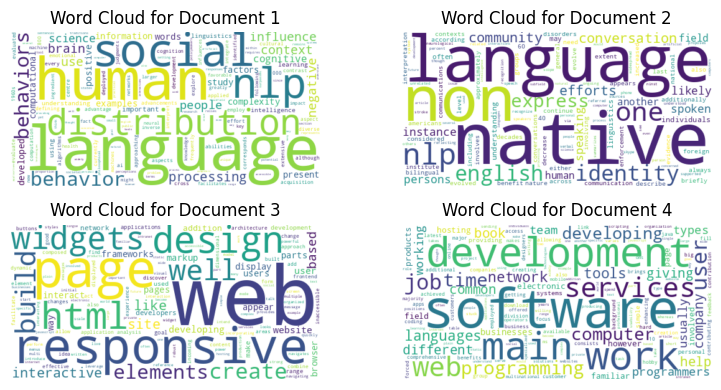

In [44]:
import re

# Step 1: Casefolding
corpus = [doc1.casefold(), doc2.casefold(), doc3.casefold(), doc4.casefold()];

# Step 2: Tokenize - no punctuation, no non-printable chars like "\n"
# regex_rule accepts only alpha-numeric chars
regex_rule = r'\w+'; #
clean_corpus = [' '.join(re.findall(regex_rule,doc)) for doc in corpus]

# Step 3: Remove stop words
stop_words = set(stopwords.words('english'))
reduced_corpus = [' '.join([word for word in doc.split() if word not in stop_words]) for doc in clean_corpus]


import matplotlib.pyplot as plt
from wordcloud import WordCloud

num_rows = 2  # Adjust the number of rows as needed
num_cols = 2  # Adjust the number of columns as needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 4))  # Adjust figure size if necessary

from sklearn.feature_extraction.text import CountVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(reduced_corpus)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

for i, doc in enumerate(lemmatized_corpus):
    # Get the TF-IDF values for the current document
    tfidf_scores = tfidf_matrix[i].toarray()[0]

    # Create a dictionary mapping words to their TF-IDF scores
    word_freq = dict(zip(feature_names, tfidf_scores))

    wordcloud = WordCloud(width=500, height=250, background_color='white').generate_from_frequencies(word_freq)
    ax = axes.flatten()[i]  # Get the current subplot
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Word Cloud for Document {i+1}")
    ax.axis('off')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()



---
---

# Appendix


## **`request`**  library

<h2 id="request-lib">request library</h2>


The `requests` library is a popular Python library used for making HTTP requests to web servers. It simplifies the process of sending and receiving data over the internet, providing a user-friendly interface for various HTTP methods (GET, POST, PUT, DELETE, etc.) and handling different response formats (HTML, JSON, XML, etc.).

**Key features and functionalities of the `requests` library:**

* **Simple API:** The library provides a straightforward interface with methods like `get()`, `post()`, `put()`, `delete()`, etc., making it easy to send different types of requests.
* **Automatic content decoding:** It automatically handles content decoding, so you don't need to worry about decoding responses yourself.
* **Request customization:** You can customize requests by setting headers, parameters, cookies, and other attributes.
* **Response handling:** The library provides methods for accessing response content, status codes, headers, and cookies.
* **Error handling:** It includes mechanisms for handling common HTTP errors and exceptions.
* **Session management:** You can create sessions to maintain persistent connections and cookies across multiple requests.

**Common use cases for the `requests` library:**

* **Web scraping:** Extracting data from web pages.
* **API interactions:** Communicating with web APIs to retrieve or send data.
* **Web testing:** Simulating user interactions with web applications.
* **Data retrieval:** Downloading files or data from the internet.

**Example usage:**

```python
import requests

# Send a GET request to a URL
response = requests.get('https://api.example.com/data')

# Check the status code
if response.status_code == 200:
    # Access the response content
    data = response.json()
    print(data)
else:
    print('Error:', response.status_code)
```

**Installation:**

If you haven't already installed the `requests` library, you can do so using pip:

```bash
pip install requests
```

By using the `requests` library, you can efficiently interact with web services and perform various network-related tasks in your Python applications.


## `BeautifulSoup` library
The BeautifulSoup library is a Python library designed for parsing HTML and XML documents. It provides a simple and intuitive API for navigating, searching, and modifying the structure and content of these documents.

**Key features and functionalities of BeautifulSoup:**

* **Parsing HTML and XML:** BeautifulSoup can parse HTML and XML documents, even with malformed or inconsistent markup.
* **Navigating the document tree:** You can easily navigate through the parsed document structure using methods like `find()`, `find_all()`, `find_parent()`, `find_next_sibling()`, etc.
* **Searching for elements:** You can search for elements based on their tags, attributes, or content using CSS selectors or custom filters.
* **Modifying the document:** You can modify the structure and content of the document by adding, removing, or replacing elements.
* **Handling attributes:** You can access and modify attributes of elements.
* **Extracting text:** You can extract text content from elements.
* **Handling special characters:** BeautifulSoup automatically handles special characters and entities.

**Common use cases for BeautifulSoup:**

* **Web scraping:** Extracting data from web pages.
* **Data cleaning:** Cleaning and preprocessing HTML or XML data.
* **HTML manipulation:** Creating or modifying HTML documents programmatically.
* **Web development:** Generating HTML content dynamically.

**Installation:**

If you haven't already installed the BeautifulSoup library, you can do so using pip:

```bash
pip install beautifulsoup4
```

By using the BeautifulSoup library, you can efficiently parse, navigate, and manipulate HTML and XML documents in your Python applications.

**Example usage:**


In [ ]:
from bs4 import BeautifulSoup

# Parse an HTML document
html_content = """
<html>
<head>
<title>Example Page</title>
</head>
<body>
<h1>Hello, World!</h1>
<p>This is a paragraph.</p>
</body>
</html>
"""

soup = BeautifulSoup(html_content, 'html.parser')

# Find the title element
title = soup.find('title')
print(title.text)  # Output: Example Page

# Find all paragraph elements
paragraphs = soup.find_all('p')
for paragraph in paragraphs:
    print(paragraph.text)  # Output: This is a paragraph.

Example Page
This is a paragraph.


## `Counter` library

The `Counter` class from the `collections` module in Python is a specialized dictionary that keeps track of the number of occurrences of each element in a sequence. It's particularly useful for counting elements in lists, tuples, or strings.

**Key features and functionalities of `Counter`:**

* **Counting elements:** You can easily count the frequency of each element in a sequence by passing it to the `Counter` constructor.
* **Element access:** Use the dictionary-like syntax to access the count of a specific element.
* **Most common elements:** The `most_common()` method returns the `n` most common elements and their counts.
* **Element update:** You can update the count of an element by directly assigning a new value to it.
* **Arithmetic operations:** You can perform arithmetic operations on `Counter` objects, such as addition, subtraction, union, and intersection.

**Common use cases:**

* **Word frequency analysis:** Count the frequency of words in a text.
* **Data analysis:** Analyze the distribution of values in a dataset.
* **Inventory management:** Track the quantity of items in stock.
* **Algorithm design:** Implement algorithms that involve counting elements.

By using the `Counter` class, you can efficiently and effectively count and analyze elements in your Python applications.

**Example usage:**



In [ ]:
from collections import Counter

# Create a Counter from a list
fruits = ['apple', 'banana', 'orange', 'apple', 'banana', 'banana']
fruit_counter = Counter(fruits)
print(fruit_counter)  # Output: Counter({'banana': 3, 'apple': 2, 'orange': 1})

# Access the count of a specific element
print(fruit_counter['apple'])  # Output: 2

# Get the most common elements
most_common_fruits = fruit_counter.most_common(2)
print(most_common_fruits)  # Output: [('banana', 3), ('apple', 2)]

# Update the count of an element
fruit_counter['banana'] += 1
print(fruit_counter)  # Output: Counter({'banana': 4, 'apple': 2, 'orange': 1})

# Arithmetic operations
counter1 = Counter('abcde')
counter2 = Counter('cdefg')
combined_counter = counter1 + counter2
print(combined_counter)  # Output: Counter({'c': 2, 'e': 2, 'a': 1, 'b': 1, 'd': 1, 'f': 1, 'g': 1})


Counter({'banana': 3, 'apple': 2, 'orange': 1})
2
[('banana', 3), ('apple', 2)]
Counter({'banana': 4, 'apple': 2, 'orange': 1})
Counter({'c': 2, 'd': 2, 'e': 2, 'a': 1, 'b': 1, 'f': 1, 'g': 1})
